# Implementation of Random Forest Classifier to predict Polycystic Ovarian Syndrome (PCOS)

- **Implementation Details** - The IEEE research paper "Accessible Polycystic Ovarian Syndrome Diagnosis Using Machine Learning" published in 2022 has been successfully applied in this project. To train the model, Kaggle's PCOS dataset is used. To extract the top 5 home-measureable features from the dataset, 3 feature selection strategies are used. Obtained two datasets with five independent features each by using the feature selection approaches. Calculated the accuracy by using the dataset as-is, then balanced the training dataset, and last balanced the complete dataset. Used SMOTEENN and Random Over Sampler as two balancing approaches. Implemented Decision Tree, Random Forest and Extra Tree Classifier from scratch. Custom Random Forest implementation, when evaluated on the SMOTEENN balanced dataset, yields an accuracy of about 97%.

# Step 1 - Import the required modules and libraries

In [1]:
# Add numpy library to allow more effective calculations
import numpy as np

# Add pandas library to support data frames
import pandas as pd

# Add seaborn, matplotlib library to support data visualization
import seaborn as seaPlt
import matplotlib.pyplot as matPlt

# Add required sklearn libraries
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Add the dataset balancing libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

# Add utility libraries
import math
import collections
from collections import Counter

# Hide the unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2 - Load the PCOS Dataset
**Dataset Details** - The 'PCOS Dataset' from Kaggle will be analyzed by using our implemented version of Random Forest Classifier. This dataset has information of 541 different patients. The number of follicles in the left and right ovaries, cycle regularity, weight growth, acne problems, etc. are only a few of the 44 features included in the dataset.
The target feature is ‘PCOS’, which tells if the patient has PCOS or not (Yes/No).

https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset?select=PCOS_data.csv

In [2]:
# Define the column names
columnNames = ['serial_number', 'patient_file_number', 'is_pcos_present', 'age',
              'weight', 'height', 'bmi', 'blood_group', 'pulse_rate', 'rr_breaths_per_min',
              'hemoglobin', 'is_cycle_regular', 'cycle_length', 'marriage_yrs', 'is_pregnant',
              'number_of_abortions', 'I_beta_hcg', 'II_beta_hcg', 'fsh', 'lh', 'fsh_lh_ratio',
              'hip_inch', 'waist_inch', 'waist_hip_ratio', 'tsh', 'amh', 'prl', 'vit_d3', 'prg',
              'rbs', 'is_weight_gained', 'is_hair_growth', 'is_skin_darkening', 'is_hair_loss',
              'pimples_present', 'eat_fast_food', 'is_regular_exerciser', 'systolic_bp',
              'diastolic_bp', 'left_ovary_follicle_number', 'right_ovary_follicle_number',
              'avg_left_follicle_size', 'avg_right_follicle_size', 'endometrium', 'unnamed']

# Load the PCOS dataset as a panda data frame
pcosDataset = pd.read_csv('PCOS_data.csv')
pcosDataset.columns = columnNames

# Print the number of rows and columns
print("There are", pcosDataset.shape[0], "rows and", pcosDataset.shape[1], "columns in the loaded dataset.")

# Verify that the dataset is properly loaded
pcosDataset.head()

There are 541 rows and 45 columns in the loaded dataset.


,serial_number,patient_file_number,is_pcos_present,age,weight,height,bmi,blood_group,pulse_rate,rr_breaths_per_min,...,eat_fast_food,is_regular_exerciser,systolic_bp,diastolic_bp,left_ovary_follicle_number,right_ovary_follicle_number,avg_left_follicle_size,avg_right_follicle_size,endometrium,unnamed
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
pcosDataDF = pcosDataset.copy(deep=True)

## 2.1 - Explore the PCOS Dataset

### a) Examine the dataset for null values and learn about the datatypes

In [4]:
pcosDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   serial_number                541 non-null    int64  
 1   patient_file_number          541 non-null    int64  
 2   is_pcos_present              541 non-null    int64  
 3   age                          541 non-null    int64  
 4   weight                       541 non-null    float64
 5   height                       541 non-null    float64
 6   bmi                          541 non-null    float64
 7   blood_group                  541 non-null    int64  
 8   pulse_rate                   541 non-null    int64  
 9   rr_breaths_per_min           541 non-null    int64  
 10  hemoglobin                   541 non-null    float64
 11  is_cycle_regular             541 non-null    int64  
 12  cycle_length                 541 non-null    int64  
 13  marriage_yrs        

**The dataset has 3 columns with null values. Furthermore, three columns contain data of the object type, which may need to be transformed into numerical format because ML algorithms only work with numerical data.**  

### b) Find the total number of null values present in the dataset

In [5]:
pcosDataDF.isnull().sum()

serial_number                    0
patient_file_number              0
is_pcos_present                  0
age                              0
weight                           0
height                           0
bmi                              0
blood_group                      0
pulse_rate                       0
rr_breaths_per_min               0
hemoglobin                       0
is_cycle_regular                 0
cycle_length                     0
marriage_yrs                     1
is_pregnant                      0
number_of_abortions              0
I_beta_hcg                       0
II_beta_hcg                      0
fsh                              0
lh                               0
fsh_lh_ratio                     0
hip_inch                         0
waist_inch                       0
waist_hip_ratio                  0
tsh                              0
amh                              0
prl                              0
vit_d3                           0
prg                 

**'marriage_yrs' has 1 null value, 'eat_fast_food' has 1 null value as well, and 'unnamed' has 539 null values in total.**

## 2.2 - Clean the PCOS Dataset

### a) Drop the unwanted columns

In [6]:
# Drop the column 'unnamed' containg almost all null and uninterpretable values
pcosDataDF = pcosDataDF.drop(columns='unnamed')
# Also, drop unnecessary columns 'serial_number' and 'patient_file_number', 
# because these columns have no impact on PCOS prediction
pcosDataDF = pcosDataDF.drop(columns=['serial_number','patient_file_number'])

In [7]:
pcosDataDF.head()

,is_pcos_present,age,weight,height,bmi,blood_group,pulse_rate,rr_breaths_per_min,hemoglobin,is_cycle_regular,...,pimples_present,eat_fast_food,is_regular_exerciser,systolic_bp,diastolic_bp,left_ovary_follicle_number,right_ovary_follicle_number,avg_left_follicle_size,avg_right_follicle_size,endometrium
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### b) Handle missing values

In [8]:
# Filled the ‘NAN’ values with mean value of the respective feature
pcosDataDF['marriage_yrs'].fillna(value = round(pcosDataDF['marriage_yrs'].mean(), 1), inplace=True)
pcosDataDF['eat_fast_food'].fillna(value = round(pcosDataDF['eat_fast_food'].mean(), 0), inplace=True)
pcosDataDF.isnull().sum()

is_pcos_present                0
age                            0
weight                         0
height                         0
bmi                            0
blood_group                    0
pulse_rate                     0
rr_breaths_per_min             0
hemoglobin                     0
is_cycle_regular               0
cycle_length                   0
marriage_yrs                   0
is_pregnant                    0
number_of_abortions            0
I_beta_hcg                     0
II_beta_hcg                    0
fsh                            0
lh                             0
fsh_lh_ratio                   0
hip_inch                       0
waist_inch                     0
waist_hip_ratio                0
tsh                            0
amh                            0
prl                            0
vit_d3                         0
prg                            0
rbs                            0
is_weight_gained               0
is_hair_growth                 0
is_skin_da

### c) Replace irrelevant values

In [9]:
# The information in the column "is_cycle_regular" indicates 
# whether a woman has a regular or irregular period. 
# Regular is denoted by 2, while irregular is denoted by 4. 
# The column contains one incorrect value, which is '5'. 
# As a result, we are changing it to 4.
pcosDataDF['is_cycle_regular'].astype('category').value_counts()

2    390
4    150
5      1
Name: is_cycle_regular, dtype: int64

In [10]:
pcosDataDF["is_cycle_regular"].replace({5: 4}, inplace=True)

In [11]:
# One of the readings for systolic blood pressure is 12 and for,
# diastolic blood pressure is 8,
# which is impossible. Hence, changing 12 to 120 and 8 to 80.
pcosDataDF["systolic_bp"].replace({12: 120}, inplace=True)
pcosDataDF["diastolic_bp"].replace({8: 80}, inplace=True)

### d) Convert object data types into numeric data types ('II    beta-HCG(mIU/mL)', 'AMH(ng/mL)')

In [12]:
# The columns "II_beta_hcg" & "amh" are an object data type 
# since they contain some irrelevant values.

# Fixing the column 'II_beta_hcg' values
pcosDataDF["II_beta_hcg"].replace({"1.99.": 1.99}, inplace=True)
pcosDataDF["II_beta_hcg"] = pcosDataDF["II_beta_hcg"].astype(float)

In [13]:
# Fixing the column 'amh' values
pcosDataDF[pcosDataDF["amh"]== "a"].T

,305
is_pcos_present,0
age,37
weight,56.0
height,152.0
bmi,24.2
blood_group,13
pulse_rate,74
rr_breaths_per_min,20
hemoglobin,11.7
is_cycle_regular,2


In [14]:
# Only one row in the dataset has an invalid valid as 'a' for the 'AMH' column. 
# Hence, we are just dropping that record.
pcosDataDF.drop(pcosDataDF.loc[pcosDataDF["amh"] == "a"].index, inplace = True);

In [15]:
# Due to the fact that we have already dealt with the string values, 
# we can convert 'AMH' column to the float datatype.
pcosDataDF["amh"] = pcosDataDF["amh"].astype(float)

In [16]:
pcosDataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_pcos_present              540 non-null    int64  
 1   age                          540 non-null    int64  
 2   weight                       540 non-null    float64
 3   height                       540 non-null    float64
 4   bmi                          540 non-null    float64
 5   blood_group                  540 non-null    int64  
 6   pulse_rate                   540 non-null    int64  
 7   rr_breaths_per_min           540 non-null    int64  
 8   hemoglobin                   540 non-null    float64
 9   is_cycle_regular             540 non-null    int64  
 10  cycle_length                 540 non-null    int64  
 11  marriage_yrs                 540 non-null    float64
 12  is_pregnant                  540 non-null    int64  
 13  number_of_abortions 

## 2.3 - Visualization of dataset features

The dataset contains 363 patients without PCOD and 177 patients with PCOD.


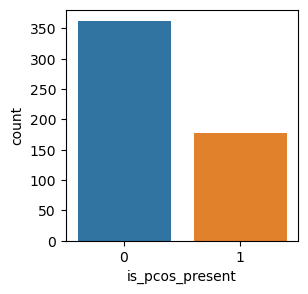

In [17]:
pcodCount = pcosDataDF['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")
matPlt.figure(figsize=(3, 3))
seaPlt.countplot( x='is_pcos_present', data = pcosDataDF);

([<matplotlib.patches.Wedge at 0x19705ad4640>,
 [Text(-0.5922937082112085, 0.9857424426357099, 'PCOS(N/0)'),
  Text(0.5665417195750191, -0.9428841286080599, 'PCOS(Y/1)')],
 [Text(-0.33477470464111786, 0.5571587719245316, '67.22%'),
  Text(0.30902275613182856, -0.5143004337862145, '32.78%')])

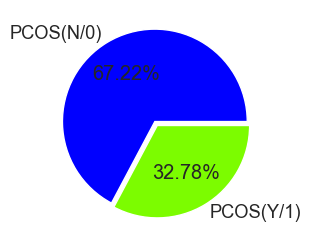

In [18]:
matPlt.figure(figsize=(3,3))
pieChart = pcosDataDF['is_pcos_present'].value_counts()
explode = (0.05, 0)
colors = ['blue', 'lawngreen']
labels = ['benign', 'malignant']
seaPlt.set(font_scale = 1.2)
matPlt.pie(pieChart, labels = ('PCOS(N/0)', 'PCOS(Y/1)'), autopct = "%.2f%%", explode = explode, colors = colors)

<AxesSubplot:xlabel='cycle_length', ylabel='count'>

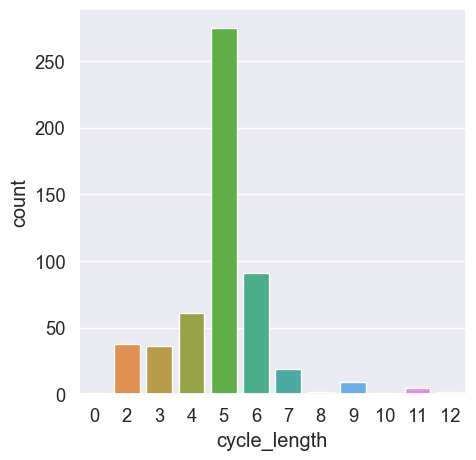

In [19]:
matPlt.figure(figsize=(5, 5))
seaPlt.countplot(x ='cycle_length',data=pcosDataDF)

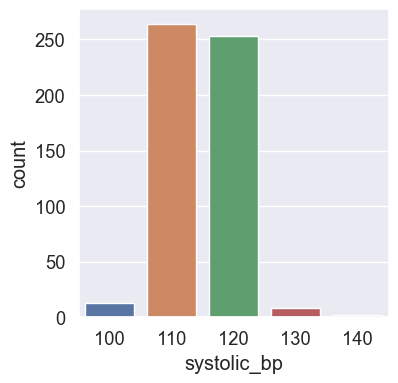

In [20]:
matPlt.figure(figsize=(4, 4))
seaPlt.countplot(x='systolic_bp', data=pcosDataDF);

In [21]:
# After cleaning the dataset, 
# print the number of rows and columns that are present.
print("After cleaning the dataset, there are", pcosDataDF.shape[0], "rows and", pcosDataDF.shape[1], "columns in the dataset.")

After cleaning the dataset, there are 540 rows and 42 columns in the dataset.


In [22]:
pcosDataDF.head()

,is_pcos_present,age,weight,height,bmi,blood_group,pulse_rate,rr_breaths_per_min,hemoglobin,is_cycle_regular,...,pimples_present,eat_fast_food,is_regular_exerciser,systolic_bp,diastolic_bp,left_ovary_follicle_number,right_ovary_follicle_number,avg_left_follicle_size,avg_right_follicle_size,endometrium
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


## 2.4 - Prepare the data required to build the model

In [23]:
# Create xFeatures and yTarget data
xFeatures = pcosDataDF.iloc[:, 1:42]

# PCOS (Y/N)
yTarget = pd.DataFrame(pcosDataDF.iloc[:, 0])

# Step 3 - Implement the Decision Tree Classifier

## 3.1 - Define class TreeNode
A class that represents a node in a decision tree

In [24]:
class TreeNode:
    # Constructor for initializing instance variables
    def __init__(self, featurePointer=None, splitValue=None, leftSubTree=None, rightSubTree=None, informationGain=None, 
                 leafNodeValue=None):
        
        # Attributes of a decision node
        # featurePointer - the chosen feature for splitting the data into two halves
        # splitValue - the chosen feature value for splitting the data into two halves
        # leftSubTree - the left sub-tree
        # rightSubTree - the right sub-tree
        # informationGain - the information gained through data splitting
        self.featurePointer = featurePointer
        self.splitValue = splitValue
        self.leftSubTree = leftSubTree
        self.rightSubTree = rightSubTree
        self.informationGain = informationGain
        
        # Attributes of a leaf node
        # leafNodeValue - the value of the leaf node (the type of class)
        self.leafNodeValue = leafNodeValue

## 3.2 - Define class DecisionTree
A class that represents a decision tree

In [25]:
class DecisionTree:
    # Constructor for initializing instance variables
    def __init__(self, minimumSamplesSplit = 2, maximumTreeDepth = 2, maxFeatures = None, parent = "RandomForest"):
        
        # minimumSamplesSplit - is the minimum number of samples required in the dataset for it to be splitted
        # maximumTreeDepth - tells the tree how deep it should grow
        # maxFeatures - The number of features to consider when looking for the best split
        # parent - Parent's name (RandomForest/ExtraTree)
        # treeRoot - root node of the tree
        self.minimumSamplesSplit = minimumSamplesSplit
        self.maximumTreeDepth = maximumTreeDepth
        self.maxFeatures = maxFeatures 
        self.parent = parent
        self.treeRoot = None
        
        # A dictionary for storing the feature names 
        # and information gain of decision tree nodes
        self.featureImportances = {}
        

    # Summary - A function that uses recursion to construct the decision tree
    # 1) Separate the features columns from the target column in the loaded dataset.
    # 2) Determine the total number of features and samples in the dataset.
    # 3) Calculate the optimal split if the number of samples in the dataset is larger than or equal to 
    # the'minimumSamplesSplit' and the current tree depth is less than or equal to the'maximumTreeDepth'.
    # 3.1) If the information gain from the split is larger than zero, employ the same function 'constructDecisionTree' 
    # to build the left and right sub trees.
    # 3.2) Create and return an instance of class TreeNode
    # 4) Assign the leaf node value to the class with the most occurrences in the dataset.
    # 5) Create and return an instance of class TreeNode
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - loadedDataset - the loaded dataset
    # Param 3 - currentTreeDepth - the current depth of the tree
    # Returns - An instance of class TreeNode
    def constructDecisionTree(self, loadedDataset, currentTreeDepth=0):
        
        # Declarations
        xFeatures, yTarget = loadedDataset[:,:-1], loadedDataset[:,-1]
        numberOfSamples, numberOfFeatures = np.shape(xFeatures)
        
        if numberOfSamples >= self.minimumSamplesSplit and currentTreeDepth <= self.maximumTreeDepth:
            # 3 - Calculate the best split
            bestSplit = self.gainBestSplit(numberOfSamples, numberOfFeatures, loadedDataset)
            
            # 3.1 - If the information gain from the split is larger than zero, employ the same function 'constructDecisionTree'to build the left and right sub trees 
            if bestSplit["informationGain"] > 0:
                leftSubTree = self.constructDecisionTree(bestSplit["leftDataset"], currentTreeDepth + 1)
                rightSubTree = self.constructDecisionTree(bestSplit["rightDataset"], currentTreeDepth + 1)
                
                # 3.2 - Create and return an instance of class TreeNode
                return TreeNode(bestSplit["featurePointer"], bestSplit["splitValue"], 
                              leftSubTree, rightSubTree, bestSplit["informationGain"])
            
        # 4 - Assign the leaf node value to the class with the most occurrences in the dataset.
        yTarget = list(yTarget)
        leafValue = max(yTarget, key=yTarget.count)
        
        # 5 - Create and return an instance of class TreeNode
        return TreeNode(leafNodeValue=leafValue)
                
    # Summary - A function that determines the dataset's optimal split
    # 1) Iterate through the randomly selected features
    # 1.1) If parent is 'RandomForest', then for every feature, extract its unique values
    # 1.1) If parent is 'ExtraTree', then for every feature, 
    # draw a random cut-point that uniformly lies between its min and max value
    # 1.2) Iterate through each unique value(RandomForest) 
    # or just the single value random cut-point(ExtraTree)
    # 1.2.1) Split the dataset into two halves(left child, right child) by 'thresholdValue'
    # 1.2.2) Calculate the information gain of the split
    # 1.2.3) If the 'currentInformationGain' information gain is greater than 'maximumInformationGain':
    # 1.2.3.1) Update the 'bestSplit' dictionary and assign the 'currentInformationGain' to 'maximumInformationGain'
    # 2) Return the dictionary 'bestSplit'
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - numberOfSamples - number of samples currently present in the dataset
    # Param 3 - numberOfFeatures - number of features in the dataset
    # Param 4 - dataset
    # Returns - Dictionary 'bestSplit'
    def gainBestSplit(self, numberOfSamples, numberOfFeatures, dataset):
        
        # Declarations
        # bestSplit - A dictionary-type variable to hold data about the data split
        bestSplit = {}
        maximumInformationGain = -float("inf")
        featureIdxs = np.random.choice(numberOfFeatures, self.maxFeatures, replace = False)
        
        # 1) Iterate through the randomly selected features
        for featurePointer in featureIdxs:
            featureValues = dataset[:, featurePointer]
            
            # 1.1) If parent is 'RandomForest', then for every feature, extract its unique values
            potentialThresholds = np.unique(featureValues)
            
            # 1.1) If parent is 'ExtraTree', then for every feature, 
            # draw a random cut-point that uniformly lies between its min and max value
            if self.parent is "ExtraTree":
                minValue = np.min(potentialThresholds)
                maxValue = np.max(potentialThresholds)
                randomCutPoint = np.random.uniform(minValue, maxValue)
                potentialThresholds = [randomCutPoint]
            
            # 1.2) Iterate through each unique value
            for thresholdValue in potentialThresholds:
                # 1.2.1) Split the dataset into two halves(left child, right child) by 'thresholdValue'
                leftSubTreeData, rightSubTreeData = self.splitData(featurePointer, thresholdValue, dataset)
                
                # 1.2.2) Calculate the information gain of this split
                if len(leftSubTreeData) > 0 and len(rightSubTreeData) > 0:
                    parentTargetData, leftTargetData, rightTargetData = dataset[:,-1], leftSubTreeData[:,-1], rightSubTreeData[:,-1]
                    currentInformationGain = self.calculateInformationGain(parentTargetData, leftTargetData, rightTargetData)
                else:
                    currentInformationGain = 0
                    
                if currentInformationGain > maximumInformationGain:
                    bestSplit["featurePointer"] = featurePointer
                    bestSplit["splitValue"] = thresholdValue
                    bestSplit["leftDataset"] = leftSubTreeData
                    bestSplit["rightDataset"] = rightSubTreeData
                    bestSplit["informationGain"] = currentInformationGain
                    maximumInformationGain = currentInformationGain
                        
        return bestSplit
                
    # Summary - A function that splits the dataset in half by feature and its split value
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - featurePointer - the chosen feature for splitting the data into two halves
    # Param 3 - splitValue - the chosen feature value for splitting the data into two halves
    # Param 4 - dataset
    # Returns - left and right sub tree data
    def splitData(self, featurePointer, splitValue, dataset):
        leftSubTreeData = np.array([dataRow for dataRow in dataset if dataRow[featurePointer] <= splitValue])
        rightSubTreeData = np.array([dataRow for dataRow in dataset if dataRow[featurePointer] > splitValue])
        return leftSubTreeData, rightSubTreeData
    
    # Summary - A function that calculates the information gain
    # Information Gain(IG) is calculated as follows:
    # IG = Entropy_parent - Entropy_child
    # The entropy of the parent node is 'Entropy_parent', 
    # while the average entropy of the child nodes is 'Entropy_child'.
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - parentTargetData - parent node target data
    # Param 3 - leftTreeTargetData - left child node target data
    # Param 4 - rightTreeTargetData - right child node target data
    # Returns - information gain
    def calculateInformationGain(self, parentTargetData, leftTreeTargetData, rightTreeTargetData):
        weightOfLeftChild = len(leftTreeTargetData) / len(parentTargetData)
        weightOfRightChild = len(rightTreeTargetData) / len(parentTargetData)
        
        # Calculate the entropy of parent node
        parentEntropy = self.calculateEntropy(parentTargetData)
        
        # Calculate the entropy of the children node
        lChildEntropy = weightOfLeftChild * self.calculateEntropy(leftTreeTargetData)
        rChildEntropy = weightOfRightChild * self.calculateEntropy(rightTreeTargetData)

        # Calculate the information gain
        infoGain = parentEntropy - (lChildEntropy + rChildEntropy)
        
        return infoGain
        
    # Summary - A function that calculates the entropy of a node
    # The entropy formula(E) for the 'Wine Recognition Dataset' will be as follows:
    # E = -(P(class_0)log2(P(class_0)) + P(class_1)log2(P(class_1)) + P(class_2)log2(P(class_2)))
    # where P is the probability of the target class
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - targetData - the target data of the node
    # Returns - the entropy of node
    def calculateEntropy(self, targetData):
        # Declarations
        nodeEntropy = 0
        
        # Obtain unique class labels, then compute the entropy
        classLabels = np.unique(targetData)
        for clsLbl in classLabels:
            classProbability = len(targetData[targetData == clsLbl]) / len(targetData)
            nodeEntropy += -classProbability * np.log2(classProbability)
            
        return nodeEntropy
    
    # Summary - A function that uses the training data to train the decision tree classifier that has been constructed
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - xTrainData - features training data
    # Param 3 - yTrainData - target training data
    def fitModel(self, xTrainData, yTrainData):
        self.maxFeatures = xTrainData.shape[1] if not self.maxFeatures else min(self.maxFeatures, xTrainData.shape[1])
        trainingDataset = np.concatenate((xTrainData, yTrainData), axis = 1)
        self.treeRoot = self.constructDecisionTree(trainingDataset)
        
    # Summary - A function that predicts the class of an instance test data
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - xTestData - testing data which includes only features data
    # Returns - the predictions clsPreditions
    def predictInstanceClass(self, xTestData):
        clsPredictions = [self.makeClsPrediction(xRow, self.treeRoot) for xRow in xTestData]
        return clsPredictions
    
    # Summary - A recursive function that traverses the built-in decision tree to anticipate the class of test data
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - testRow - test data row which includes only features data
    # Param 3 - decTree - the constructed decision tree model
    # Returns - the prediction for the test data row
    def makeClsPrediction(self, testRow, decTree):
        if decTree.leafNodeValue != None: 
            return decTree.leafNodeValue
        
        # Get the feature value of the feature index
        featureValue = testRow[decTree.featurePointer]
        
        # Travel over the left or right subtree based on the featureValue
        if featureValue <= decTree.splitValue:
            return self.makeClsPrediction(testRow, decTree.leftSubTree)
        else:
            return self.makeClsPrediction(testRow, decTree.rightSubTree) 
        
    # Summary - A recursive function that traverses the TreeNode and displays the corresponding information of each node and its subtrees
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - independentFeatures - the training features
    # Param 2 - treeNode - The constructed decision tree model
    # Param 3 - space - The constant for displaying space         
    def displayTree(self, independentFeatures, treeNode=None, space=" "):
        if not treeNode:
            treeNode = self.treeRoot

        if treeNode.leafNodeValue is not None:
            print(treeNode.leafNodeValue)

        else:
            print("feature_"+ str(treeNode.featurePointer) + "_" + str(independentFeatures.columns[treeNode.featurePointer]), 
                  "<=", treeNode.splitValue, "?", "InfoGain:", treeNode.informationGain)
            print("%sleft:" % (space), end = "")
            self.displayTree(treeNode.leftSubTree, space + space)
            print("%sright:" % (space), end = "")
            self.displayTree(treeNode.rightSubTree, space + space)
            
    # Summary - A recursive function that calculates the feature importances.
    # The more information gained, the more significant the feature is to the model
    # Param 1 - self - Used to access methods of the class and instance variables
    # Param 2 - independentFeatures - the training features
    # Param 2 - treeNode - The constructed decision tree model  
    def getFeatureImportances(self, independentFeatures, treeNode=None):
        if not treeNode:
            treeNode = self.treeRoot
            
        if treeNode.leafNodeValue is not None:
            return
        else:
            featureName = str(independentFeatures.columns[treeNode.featurePointer])
            infoGain = treeNode.informationGain
            
            if self.featureImportances is not None and featureName in self.featureImportances:
                self.featureImportances[featureName] = self.featureImportances[featureName] + infoGain
            else:
                self.featureImportances[featureName] = infoGain
            
            self.getFeatureImportances(independentFeatures, treeNode.leftSubTree)
            self.getFeatureImportances(independentFeatures, treeNode.rightSubTree)

# Step 4 - Implement the Random Forest Classifier

## 4.1 - Define class RandomForest
A class that represents a random forest

In [26]:
class RandomForest:
    # Constructor for initializing instance variables
    def __init__(self, numOfTrees = 25, maxFeatures = None, 
                 minimumSamplesSplit = 3, maximumTreeDepth = 3):
        # numOfTrees - Number of trees to be used for random forest building
        # maxFeatures - The number of features to consider when looking for the best split
        # minimumSamplesSplit - is the minimum number of samples required in the dataset for it to be splitted
        # maximumTreeDepth - tells the tree how deep it should grow
        # decisionTrees - An array storing individually trained decision trees
        self.numOfTrees = numOfTrees
        self.maxFeatures = maxFeatures
        self.minimumSamplesSplit = minimumSamplesSplit
        self.maximumTreeDepth = maximumTreeDepth
        self.decisionTrees = []
        
    # Summary - A function that will create a bootstrapped dataset from the main dataset
    # Param 1 - xFeatures - the training features
    # Param 2 - yTarget - the target feature
    # Returns - bootstrapped data (Dataset that will contain duplicate rows)
    @staticmethod
    def _sample(xFeatures, yTarget):
        numberOfRows = xFeatures.shape[0]
        
        # Create samples with replacement
        index = np.random.choice(a = numberOfRows, 
                                   size = numberOfRows, 
                                   replace = True)
        
        return xFeatures[index], yTarget[index]
    
    
    # Summary - A function that will train the model on the training data
    # Param 1 - Used to access methods of the class and instance variables
    # Param 2 - xFeatures - the training features
    # Param 3 - yTarget - the target feature
    def fit(self, xFeatures, yTarget):
        xFeatures = xFeatures.values
        yTarget = yTarget.values
        
        # Reset the values of the class variables
        if len(self.decisionTrees) > 0:
            self.decisionTrees = []
            
        # If the maxFeatures is not given, then consider 
        # sqaure root value of all the features
        numberOfFeatures = xFeatures.shape[1]
        if self.maxFeatures == None:
            self.maxFeatures = int(math.sqrt(numberOfFeatures))
            
        # Construct each decision tree of the random forest
        countOfBuiltTrees = 0
        while countOfBuiltTrees < self.numOfTrees:
            try:
                # Create an instance of DecisionTree
                decisionTreeClassifier = DecisionTree(minimumSamplesSplit = self.minimumSamplesSplit, 
                                                      maximumTreeDepth = self.maximumTreeDepth,
                                                      maxFeatures = self.maxFeatures)
                
                # Obtain bootstrapped dataset
                sampledXFeatures, sampledYTarget = self._sample(xFeatures, yTarget)
                
                # Train the decision tree on the training data
                decisionTreeClassifier.fitModel(sampledXFeatures, sampledYTarget)
                
                # Save the classifier
                self.decisionTrees.append(decisionTreeClassifier)
            
                countOfBuiltTrees += 1
                
            except Exception as e:
                print("An error has occurred while building decision trees of a random forest:", e)
                countOfBuiltTrees += 1
                continue
    
    # Summary - A function that will be used for making predictions
    # It will use majority voting for the final prediction
    # Param 1 - Used to access methods of the class and instance variables
    # Param 2 - xTestData - test data
    # Param 3 - yTarget - the target feature
    # Returns - predictions
    def predict(self, xTestData):
        xTestData = xTestData.values
        
        # Make predictions with every decision tree in the forest
        yPredictions = []
        
        for tree in self.decisionTrees:
            yPredictions.append(tree.predictInstanceClass(xTestData))
        
        # Reshape so we can find the most common value
        yPredictions = np.swapaxes(a = yPredictions, 
                                   axis1 = 0, 
                                   axis2 = 1)
        
        # Use majority voting for the final prediction
        finalPredictions = []
        for preds in yPredictions:
            counter = Counter(preds)
            finalPredictions.append(counter.most_common(1)[0][0])
        return finalPredictions

# Step 5 - Implement the Extra Tree Classifier

## 5.1 - Define class ExtraTreeClassifier
A class that represents a extra tree classifier

In [27]:
class ExtraTreeClassifier:
    # Constructor for initializing instance variables
    def __init__(self, numOfTrees = 25, maxFeatures = None, 
                 minimumSamplesSplit = 3, maximumTreeDepth = 3):
        # numOfTrees - Number of trees to be used for random forest building
        # maxFeatures - The number of features to consider when looking for the best split:
        # minimumSamplesSplit - is the minimum number of samples required in the dataset for it to be splitted
        # maximumTreeDepth - tells the tree how deep it should grow
        self.numOfTrees = numOfTrees
        self.maxFeatures = maxFeatures
        self.minimumSamplesSplit = minimumSamplesSplit
        self.maximumTreeDepth = maximumTreeDepth
        
        # A dictionary for storing the feature names 
        # and information gain of decision tree nodes
        # of all decision trees
        self.treeImportances = {}
        
    # Summary - A function that will train the model on the training data
    # Param 1 - Used to access methods of the class and instance variables
    # Param 2 - xFeatures - the training features
    # Param 3 - yTarget - the target feature
    def fit(self, xFeatures, yTarget):
        
        xFeaturesDF = xFeatures
        xFeatures = xFeatures.values
        yTarget = yTarget.values
        
        # If the maxFeatures is not given, then consider 
        # sqaure root value of all the features.
        numberOfFeatures = xFeatures.shape[1]
        if self.maxFeatures == None:
            self.maxFeatures = int(math.sqrt(numberOfFeatures))
            
        # Construct each decision tree of the extra tree classifier
        countOfBuiltTrees = 0
        while countOfBuiltTrees < self.numOfTrees:
            try:
                # Create an instance of DecisionTree
                decisionTreeClassifier = DecisionTree(minimumSamplesSplit = self.minimumSamplesSplit, 
                                                      maximumTreeDepth = self.maximumTreeDepth,
                                                      maxFeatures = self.maxFeatures, 
                                                      parent = "ExtraTree")

                # Train the decision tree on the training data
                decisionTreeClassifier.fitModel(xFeatures, yTarget)
                
                # Calculate the total information gain for every feature
                # Get the feature importances for this decision tree
                # And store the data in self.treeImportances
                decisionTreeClassifier.getFeatureImportances(xFeaturesDF)
                featuresImps = decisionTreeClassifier.featureImportances
                for featureKey, featureValue in featuresImps.items():
                    if self.treeImportances is not None and featureKey in self.treeImportances:
                        self.treeImportances[featureKey] = self.treeImportances[featureKey] + featureValue
                    else:
                        self.treeImportances[featureKey] = featureValue

                countOfBuiltTrees += 1
                
            except Exception as e:
                print("An error has occurred while building decision trees of an extra tree classifier.:", e)
                countOfBuiltTrees += 1
                continue
                
    # Summary - A function that will return the calculated feature importances
    # Param 1 - Used to access methods of the class and instance variables
    # Returns - self.treeImportances
    def getFeatureImportances(self):
        return self.treeImportances

# Step 6 - Define the constants

In [28]:
numberOfFeaturesUsedForAnalysis = 20
crossFolds = 5

# Step 7 - Scale the data

In [29]:
# Scale the independent features
def scaleData(xTrain, columns, xTest = None):
    
    scaler = MinMaxScaler().fit(xTrain)
    
    xTrain = scaler.transform(xTrain)
    xTrain = pd.DataFrame(xTrain)
    xTrain.columns = columns
    
    if xTest is not None:
        xTest = scaler.transform(xTest)
        xTest = pd.DataFrame(xTest)
        xTest.columns = columns
    else:
        return xTrain
    
    return xTrain, xTest

# Step 8 - Applying Feature Selection Techniques
**The following feature selection strategies were employed in the research paper.**
- Extra Tree Classifier
- Chi-Square Method
- Correlation Matrix

## 8.1 - Extra Tree Classifier

### a - Use Sklearn's Extra Tree Classifier

In [30]:
# Scale the features
xScaled = scaleData(xFeatures, 
                       xFeatures.columns)

# Use Sklearn's Extra Tree Classifier to extract the top 20 features
sklearnExtraTree = ExtraTreesClassifier(criterion ='entropy', 
                                         random_state = 99, 
                                         max_features = 'sqrt', 
                                         n_estimators = 40,
                                         min_samples_split = 3,
                                         max_depth = 3)

# Training the model
sklearnExtraTree.fit(xScaled, yTarget)
  
# Computing the importance of each feature,
# and then normalizing the individual importances
sklearnNormalizedFeatureImportances = np.std([tree.feature_importances_ for tree in 
                                        sklearnExtraTree.estimators_],
                                        axis = 0)

skLearnFeatureImpSeries = pd.Series(sklearnNormalizedFeatureImportances, 
                                    index = xFeatures.columns)

skLearnFeatureImpSeries.sort_values(ascending = False , inplace = True)

# Print the top 'numberOfFeaturesUsedForAnalysis' features,
# obtained through sklearn's extra tree classifier
print(skLearnFeatureImpSeries[0:numberOfFeaturesUsedForAnalysis])

is_skin_darkening              0.256382
is_hair_growth                 0.252754
right_ovary_follicle_number    0.231117
left_ovary_follicle_number     0.186074
eat_fast_food                  0.145683
is_weight_gained               0.140833
is_cycle_regular               0.121088
pimples_present                0.070303
cycle_length                   0.029300
is_hair_loss                   0.024983
age                            0.021779
amh                            0.019644
hip_inch                       0.016680
lh                             0.009228
avg_left_follicle_size         0.007848
bmi                            0.007603
weight                         0.007522
is_regular_exerciser           0.007025
waist_inch                     0.006763
endometrium                    0.006211
dtype: float64


<AxesSubplot:title={'center':'Sklearn Extra Tree Classifier for Feature Selection'}, ylabel='Features'>

<Figure size 5000x5000 with 0 Axes>

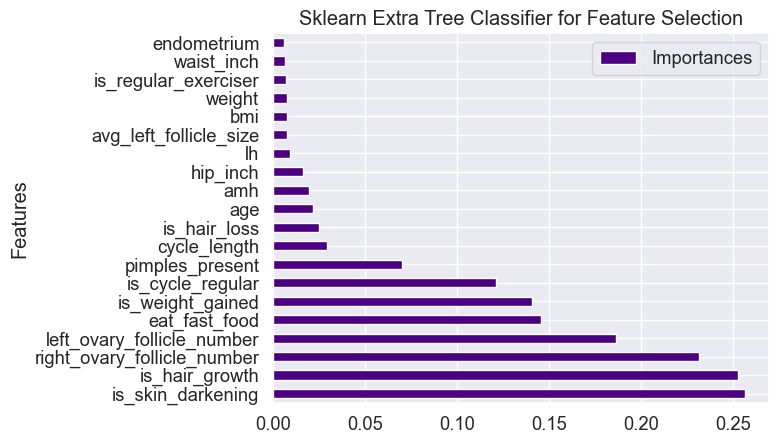

In [31]:
skLearnFeatureImpDF = pd.DataFrame({'Features':skLearnFeatureImpSeries.index, 
              'Importances':skLearnFeatureImpSeries.values})
skLearnFeatureImpDF.sort_values('Importances', inplace=True)

matPlt.figure(figsize = (50,50))

skLearnTopFeatureImpDF = skLearnFeatureImpDF.tail(numberOfFeaturesUsedForAnalysis)
skLearnTopFeatureImpDF.sort_values('Importances', 
                                   ascending = False).plot(kind = 'barh', 
                                                           y = 'Importances', 
                                                           x = 'Features', 
                                                           color = 'indigo',
                                                           title = 'Sklearn Extra Tree Classifier for Feature Selection')

**The importance of features might have different values than the ones that are presented in the paper, because of the random nature of feature samples.**

### b - Use our implemented Extra Tree Classifier

In [32]:
# Create an instance of ExtraTreeClassifier
extraTrees = ExtraTreeClassifier(numOfTrees = 40, 
                                 minimumSamplesSplit = 3, 
                                 maximumTreeDepth = 3)

# Training the model
extraTrees.fit(xScaled, yTarget)

# Get the feature importances
# To perform feature selection, 
# each feature is ordered in descending order according to the 
# total information gained of each feature 
# and the user selects the top k features according to his/her choice.
impFeatures = extraTrees.getFeatureImportances()
sortedImpFeatures = sorted(impFeatures.items(), 
                           key = lambda x: x[1], reverse=True)
sortedTopTwentyFeatures = sortedImpFeatures[0:20]

featureNames = []
featureImps = []
for featureName, infoGain in sortedTopTwentyFeatures:
    featureNames.append(featureName)
    featureImps.append(infoGain)
    
sortedTopTwentyFeatures

[('right_ovary_follicle_number', 8.431425840957072),
 ('is_cycle_regular', 5.660969991399224),
 ('is_skin_darkening', 5.039372676843477),
 ('left_ovary_follicle_number', 4.309932849387054),
 ('is_hair_growth', 3.952673145233976),
 ('is_weight_gained', 2.8717177219404872),
 ('eat_fast_food', 2.1769935391322606),
 ('pimples_present', 1.72237876453653),
 ('is_hair_loss', 1.2307264981215467),
 ('weight', 0.9871620559342918),
 ('avg_left_follicle_size', 0.9763924911646656),
 ('avg_right_follicle_size', 0.9335243308681718),
 ('cycle_length', 0.9095863543474042),
 ('prl', 0.8787622720218471),
 ('marriage_yrs', 0.7584901195370188),
 ('endometrium', 0.7457888969487416),
 ('is_pregnant', 0.659773878129974),
 ('lh', 0.5974652592374927),
 ('I_beta_hcg', 0.543476526287848),
 ('prg', 0.540291857719617)]

<AxesSubplot:title={'center':'Our Extra Tree Classifier for Feature Selection'}, ylabel='Features'>

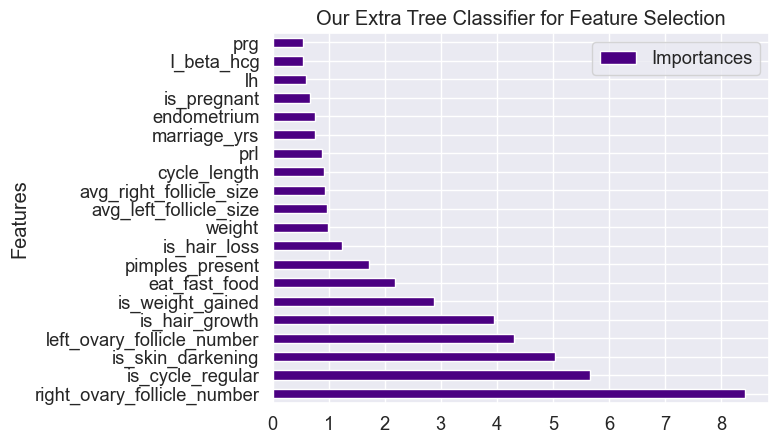

In [33]:
featureImpDF = pd.DataFrame({'Features': featureNames, 
              'Importances': featureImps})
featureImpDF.sort_values('Importances', inplace=True)
featureImpDF.sort_values('Importances', 
                         ascending = False).plot(kind = 'barh', 
                                                 y = 'Importances', 
                                                 x = 'Features', 
                                                 color = 'indigo',
                                                 title = 'Our Extra Tree Classifier for Feature Selection')

### c - Extract top 5 measureable features

In [34]:
# Top 5 home measureable features obtained through our and sklearn's extra tree classifier
extraTreeTop5FeaturesDF = xFeatures[['is_skin_darkening', 'is_hair_growth',
                                     'is_weight_gained', 'is_cycle_regular', 
                                     'eat_fast_food']].copy(deep=True)

## 8.2 - Sklearn's Chi-Square Method

In [35]:
# Perform chi-square test on the cleaned dataset using SKLearn's chi2 module
chiSquareTest = chi2(xFeatures, yTarget)
# print("The chi square values are:", chiSquareTest[0])
print("The p-values are:", chiSquareTest[1])

The p-values are: [1.75475513e-004 2.18939168e-012 4.50520491e-001 1.34601745e-004
 6.79481312e-001 2.68007029e-001 7.37126609e-001 5.95575074e-001
 1.83342736e-007 5.36220498e-003 6.11101928e-006 6.01112285e-001
 8.39168306e-002 0.00000000e+000 3.63670247e-202 0.00000000e+000
 0.00000000e+000 8.31822656e-023 1.57709305e-002 1.81942010e-002
 9.87764700e-001 7.73867361e-001 3.94314931e-052 8.19572027e-001
 0.00000000e+000 6.50739386e-007 3.45918873e-002 6.78791157e-016
 3.87100365e-020 3.87296366e-020 3.15008069e-003 1.74146871e-006
 1.32281624e-009 1.71312529e-001 8.72383232e-001 7.70876508e-001
 1.55861653e-126 3.49909250e-148 4.21724906e-003 5.46335183e-002
 6.96995009e-002]


In [36]:
# Features with low p-values are considered to be more strongly 
# associated with the target variable and are selected 
# for further analysis or modeling.
pValues = pd.Series(chiSquareTest[1], index = xFeatures.columns)
pValues.sort_values(ascending = True , inplace = True)

# Display the top 'numberOfFeaturesUsedForAnalysis'
pValues[0:numberOfFeaturesUsedForAnalysis]

I_beta_hcg                      0.000000e+00
lh                              0.000000e+00
vit_d3                          0.000000e+00
fsh                             0.000000e+00
II_beta_hcg                    3.636702e-202
right_ovary_follicle_number    3.499093e-148
left_ovary_follicle_number     1.558617e-126
amh                             3.943149e-52
fsh_lh_ratio                    8.318227e-23
is_hair_growth                  3.871004e-20
is_skin_darkening               3.872964e-20
is_weight_gained                6.787912e-16
weight                          2.189392e-12
eat_fast_food                   1.322816e-09
is_cycle_regular                1.833427e-07
prg                             6.507394e-07
pimples_present                 1.741469e-06
marriage_yrs                    6.111019e-06
bmi                             1.346017e-04
age                             1.754755e-04
dtype: float64

In [37]:
# Top 5 home measureable features obtained through sklearn's chi square test
chiSquareTop5FeaturesDF = xFeatures[['is_hair_growth', 
                                     'is_skin_darkening', 
                                     'is_weight_gained', 
                                     'weight', 
                                     'eat_fast_food']].copy(deep=True)

## 8.3 - Correlation Matrix
Correlation states how the features are related to each other or the target variable.

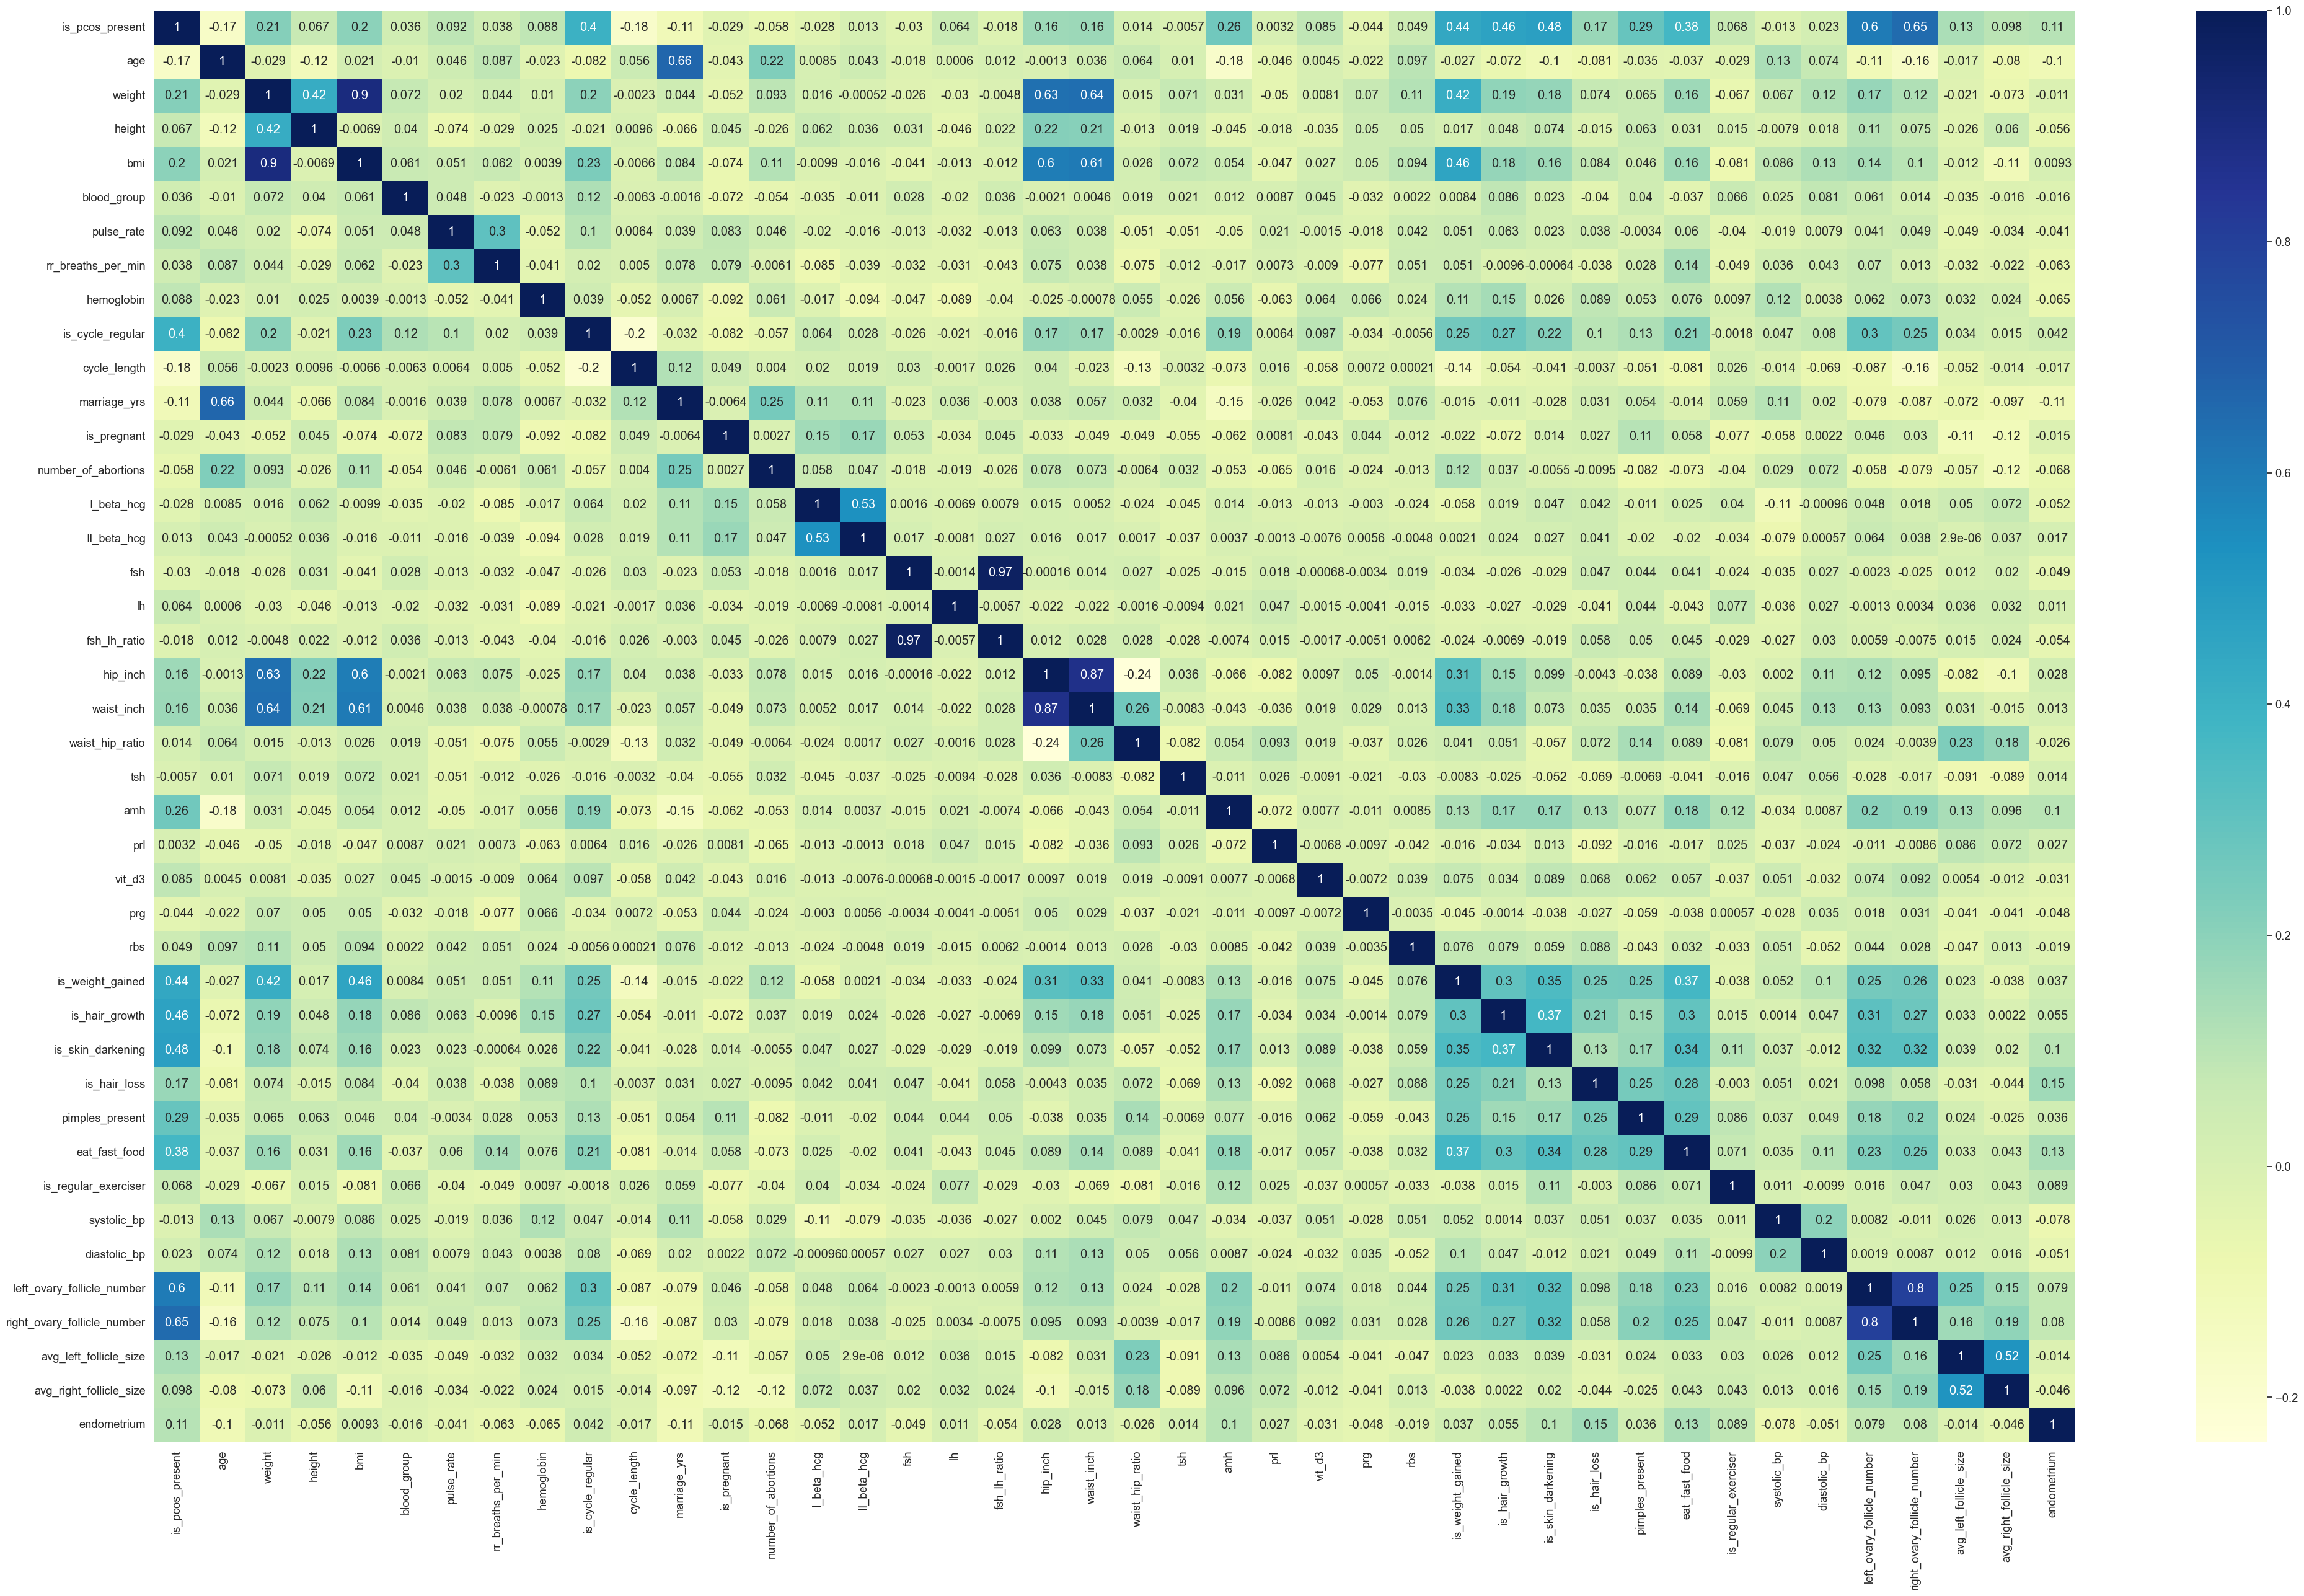

In [38]:
# To see correlations between variables, use a heatmap.
correlatedData = pcosDataDF.corr()
matPlt.figure(figsize=(50,30))
seaPlt.heatmap(correlatedData, cmap="YlGnBu", annot=True)
matPlt.show()

In [39]:
corrMatrixImpFeaturesSeries = correlatedData['is_pcos_present'].copy()
corrMatrixImpFeaturesSeries.sort_values(ascending = False , inplace = True, key=abs)
corrMatrixImpFeaturesSeries
corrMatrixImpFeaturesSeries[1:(numberOfFeaturesUsedForAnalysis + 3)]

right_ovary_follicle_number    0.648223
left_ovary_follicle_number     0.603109
is_skin_darkening              0.475283
is_hair_growth                 0.464245
is_weight_gained               0.440488
is_cycle_regular               0.399995
eat_fast_food                  0.375389
pimples_present                0.287802
amh                            0.263863
weight                         0.211628
bmi                            0.199753
cycle_length                  -0.178509
is_hair_loss                   0.171913
age                           -0.167422
waist_inch                     0.164378
hip_inch                       0.161480
avg_left_follicle_size         0.133808
marriage_yrs                  -0.112374
endometrium                    0.105151
avg_right_follicle_size        0.097950
pulse_rate                     0.092084
hemoglobin                     0.088046
Name: is_pcos_present, dtype: float64

In [40]:
# Top 5 home measureable features obtained through correlation matrix
corrMatrixTop5FeaturesDF = xFeatures[['is_skin_darkening', 'is_hair_growth', 
                                            'is_weight_gained', 'is_cycle_regular',
                                            'eat_fast_food']].copy(deep=True)

# Step 9 - Separate the data into training and testing sets

In [41]:
def getTrainTestDataset(featuresData, targetData, dataSplitRandomState):
    # The dataset is divided using the 'train_test_split()' method of the'sklearn.model_selection' module
    # 80% of the data is set aside for training and 20% for testing
    x_train, x_test, y_train, y_test = train_test_split(featuresData, targetData, 
                                                        train_size = 0.8, test_size = 0.2, 
                                                        random_state = dataSplitRandomState)
    
    return x_train, x_test, y_train, y_test

def getTrainTestScaledData(features, target, 
                    dataSplitRandomState, 
                    balanceTrainingData = False,
                    balStrategy = 'RANDOM_OVER',
                    dataBalanceRandomState = 99):
    # Split the dataset
    xTrain, xTest, yTrain, yTest = getTrainTestDataset(features, 
                                                       target, 
                                                       dataSplitRandomState)
    if balanceTrainingData == True:
        xTrain, yTrain = balanceDataset(xTrain, yTrain, 
                           dataBalanceTechinique = balStrategy,
                           balanceDataRandomState = dataBalanceRandomState)
        
    # Scale the features
    xTrainScaled, xTestScaled = scaleData(xTrain, xTrain.columns, xTest)
    
    return xTrainScaled, xTestScaled, yTrain, yTest

# Step 10 - Balance the dataset

In [42]:
# For balancing the dataset, we have used the following two techniques:
# 1. 'Random Oversampling technique', that randomly duplicate examples
# in the minority class
# 2. SMOTEENN - Class to perform over-sampling using SMOTE and under-sampling using ENN
def balanceDataset(featuresData, targetData, 
                   dataBalanceTechinique = 'RANDOM_OVER',
                   balanceDataRandomState = 43):
    
    resample = RandomOverSampler(random_state = balanceDataRandomState,
                                sampling_strategy = 'minority')
    
    if dataBalanceTechinique is 'SMOTEENN':
        resample = SMOTEENN(random_state = balanceDataRandomState, 
                            sampling_strategy = 'minority')
       
    X, y = resample.fit_resample(featuresData, targetData)
    return X, y

# Step 11 - Create helper methods

In [43]:
def plotClassDistribution(targetData, title):
    # Plot the class distribution
    matPlt.figure(figsize=(3,3))
    plotDataBal = targetData.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))
    plotDataBal.set_title(title)

# Step 12 - Analysis on the Imbalanced Dataset

## Step 12.1 - Use Random Forest Classifier to analyze the top 5 home-measurable features found using Sklearn's Chi Square Test

---Unbalanced Dataset---
There are 540 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 363 patients without PCOD and 177 patients with PCOD.


Text(0.5, 1.0, 'Unbalanced Dataset')

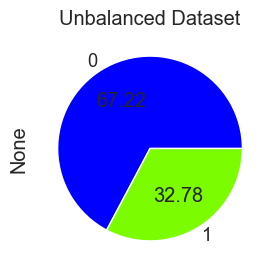

In [44]:
# Print the number of rows and columns
print('---Unbalanced Dataset---')
print("There are", chiSquareTop5FeaturesDF.shape[0], 
      "rows and", 
      chiSquareTop5FeaturesDF.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = yTarget['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = yTarget.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("Unbalanced Dataset")

In [45]:
# Calculate the best params using Sklearn's cross-fold(5) validation and GridSearchCSV

# Scale the features
XUnbalancedScaledChi = scaleData(chiSquareTop5FeaturesDF, 
                       chiSquareTop5FeaturesDF.columns)

oldParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [40, 80, 100],
    'max_features': ['sqrt'],
    'max_depth' : [4,5,6],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 100],
    'min_samples_split':[2]
}


# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldChi = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldChi.fit(XUnbalancedScaledChi, yTarget)

# Print the scores
gridSearchCrossFoldChiUnbalancedBestParams = gridSearchCrossFoldChi.best_params_

print(gridSearchCrossFoldChi.best_params_)
print(gridSearchCrossFoldChi.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 12}
0.8314814814814815


Text(0.5, 1.0, 'Unbalanced Training Set')

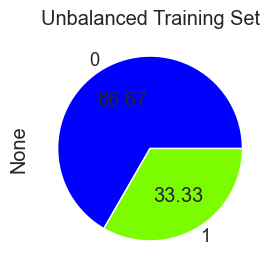

In [46]:
# Split the features into training and testing
xTrainUnChi, xTestUnChi, yTrainUnChi, yTestUnChi = getTrainTestDataset(chiSquareTop5FeaturesDF, 
                                                               yTarget, 
                                                               gridSearchCrossFoldChiUnbalancedBestParams['random_state'])

# Scale the independent features
xTrainChiUnScaled, xTestChiUnScaled = scaleData(xTrainUnChi, xTrainUnChi.columns, xTestUnChi)

# Plot the class distribution
matPlt.figure(figsize=(3,3))
plotDataBal = yTrainUnChi.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("Unbalanced Training Set")

In [47]:
# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldChiUnbalancedBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainChiUnScaled, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = sklearnRandomForestUnBalanced.predict(xTestChiUnScaled)

# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestChiUnBal = RandomForest(numOfTrees = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'])

# Train the model
customRandomForestChiUnBal.fit(xTrainChiUnScaled, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = customRandomForestChiUnBal.predict(xTestChiUnScaled)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))

--Sklearn Random Forest Classifier--
0.8703703703703703
[[71  4]
 [10 23]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        75
           1       0.85      0.70      0.77        33

    accuracy                           0.87       108
   macro avg       0.86      0.82      0.84       108
weighted avg       0.87      0.87      0.87       108


--Our Random Forest Classifier--
0.8703703703703703
[[71  4]
 [10 23]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        75
           1       0.85      0.70      0.77        33

    accuracy                           0.87       108
   macro avg       0.86      0.82      0.84       108
weighted avg       0.87      0.87      0.87       108



## Step 12.2 - Use Random Forest Classifier to analyze the top 5 home-measurable features found using Extra Tree Classifier & Correlation Matrix

In [48]:
# Scale the features
XScaledCorrExtraUnBal = scaleData(corrMatrixTop5FeaturesDF, 
                       corrMatrixTop5FeaturesDF.columns)

olderParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [100, 125, 150],
    'max_features': ['sqrt'],
    'max_depth' : [4,5,6],
    'criterion' :['entropy'],
    'random_state' : [56, 99, 100],
    'min_samples_split':[2]
}

# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldCorrExtraUnBal = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldCorrExtraUnBal.fit(XScaledCorrExtraUnBal, yTarget)

# Print the scores
gridSearchCrossFoldCorrExtraUnBalBestParams = gridSearchCrossFoldCorrExtraUnBal.best_params_

print(gridSearchCrossFoldCorrExtraUnBal.best_params_)
print(gridSearchCrossFoldCorrExtraUnBal.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 125, 'random_state': 100}
0.8277777777777778


Text(0.5, 1.0, 'Unbalanced Training Set')

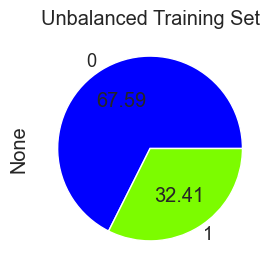

In [49]:
# Split the features into training and testing
xTrainUnCorr, xTestUnCorr, yTrainUnCorr, yTestUnCorr = getTrainTestDataset(corrMatrixTop5FeaturesDF, 
                                                               yTarget, 
                                                               gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'])

# Scale the independent features
xTrainCorrUnScaled, xTestCorrUnScaled = scaleData(xTrainUnCorr, xTrainUnCorr.columns, xTestUnCorr)

# Plot the class distribution
matPlt.figure(figsize=(3,3))
plotDataBal = yTrainUnCorr.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("Unbalanced Training Set")

In [50]:
# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainCorrUnScaled, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = sklearnRandomForestUnBalanced.predict(xTestCorrUnScaled)

# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestCorrUnBal = RandomForest(numOfTrees = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'])

# Train the model
customRandomForestCorrUnBal.fit(xTrainCorrUnScaled, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = customRandomForestCorrUnBal.predict(xTestCorrUnScaled)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

--Sklearn Random Forest Classifier--
0.8333333333333334
[[65  6]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        71
           1       0.81      0.68      0.74        37

    accuracy                           0.83       108
   macro avg       0.83      0.80      0.81       108
weighted avg       0.83      0.83      0.83       108


--Our Random Forest Classifier--
0.8055555555555556
[[62  9]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        71
           1       0.74      0.68      0.70        37

    accuracy                           0.81       108
   macro avg       0.79      0.77      0.78       108
weighted avg       0.80      0.81      0.80       108



# Step 13 - Analysis on the Balanced Training Dataset

## Step 13.1 - Use Random Forest Classifier to analyze the top 5 home-measurable features found using Sklearn's Chi Square Test

-- Balancing Training Dataset - Random Over Sampler --

--Sklearn Random Forest Classifier--
0.8888888888888888
[[70  5]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        75
           1       0.84      0.79      0.81        33

    accuracy                           0.89       108
   macro avg       0.87      0.86      0.87       108
weighted avg       0.89      0.89      0.89       108


--Our Random Forest Classifier--
0.8703703703703703
[[66  9]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        75
           1       0.76      0.85      0.80        33

    accuracy                           0.87       108
   macro avg       0.84      0.86      0.85       108
weighted avg       0.88      0.87      0.87       108

-- Balancing Training Dataset - SMOTEENN --

--Sklearn Random Forest Classifier--
0.8888888888888888
[[66  9]
 [ 3 30]]
              precision

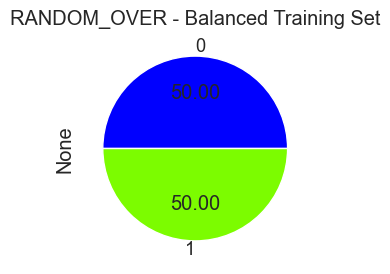

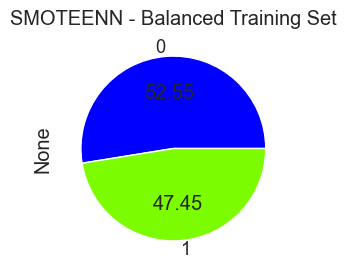

In [51]:
# Split the features into training and testing
xTrainUnChi, xTestUnChi, yTrainUnChi, yTestUnChi = getTrainTestScaledData(chiSquareTop5FeaturesDF, yTarget, 
                    gridSearchCrossFoldChiUnbalancedBestParams['random_state'], 
                    balanceTrainingData = True,
                    balStrategy = 'RANDOM_OVER',
                    dataBalanceRandomState = gridSearchCrossFoldChiUnbalancedBestParams['random_state'])


plotClassDistribution(yTrainUnChi, "RANDOM_OVER - Balanced Training Set")

# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldChiUnbalancedBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainUnChi, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = sklearnRandomForestUnBalanced.predict(xTestUnChi)

print('-- Balancing Training Dataset - Random Over Sampler --\n')
# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestChiUnBal = RandomForest(numOfTrees = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'])

# Train the model
customRandomForestChiUnBal.fit(xTrainUnChi, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = customRandomForestChiUnBal.predict(xTestUnChi)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))

##############################################################################
# Split the features into training and testing
xTrainUnChi, xTestUnChi, yTrainUnChi, yTestUnChi = getTrainTestScaledData(chiSquareTop5FeaturesDF, yTarget, 
                    gridSearchCrossFoldChiUnbalancedBestParams['random_state'], 
                    balanceTrainingData = True,
                    balStrategy = 'SMOTEENN',
                    dataBalanceRandomState = gridSearchCrossFoldChiUnbalancedBestParams['random_state'])


plotClassDistribution(yTrainUnChi, "SMOTEENN - Balanced Training Set")

# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldChiUnbalancedBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainUnChi, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = sklearnRandomForestUnBalanced.predict(xTestUnChi)

print('-- Balancing Training Dataset - SMOTEENN --\n')
# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestChiUnBal = RandomForest(numOfTrees = gridSearchCrossFoldChiUnbalancedBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiUnbalancedBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiUnbalancedBestParams['min_samples_split'])

# Train the model
customRandomForestChiUnBal.fit(xTrainUnChi, yTrainUnChi)

# Make predictions
yPredictionsChiUnBal = customRandomForestChiUnBal.predict(xTestUnChi)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnChi, yPredictionsChiUnBal))
print(confusion_matrix(yTestUnChi, yPredictionsChiUnBal))
print(classification_report(yTestUnChi, yPredictionsChiUnBal))


## Step 13.2 - Use Random Forest Classifier to analyze the top 5 home-measurable features found using Extra Tree Classifier & Correlation Matrix

-- Balancing Training Dataset - Random Over Sampler --

--Sklearn Random Forest Classifier--
0.8148148148148148
[[62  9]
 [11 26]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.74      0.70      0.72        37

    accuracy                           0.81       108
   macro avg       0.80      0.79      0.79       108
weighted avg       0.81      0.81      0.81       108


--Our Random Forest Classifier--
0.7962962962962963
[[59 12]
 [10 27]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        71
           1       0.69      0.73      0.71        37

    accuracy                           0.80       108
   macro avg       0.77      0.78      0.78       108
weighted avg       0.80      0.80      0.80       108

-- Balancing Training Dataset - SMOTEENN --

--Sklearn Random Forest Classifier--
0.7870370370370371
[[66  5]
 [18 19]]
              precision

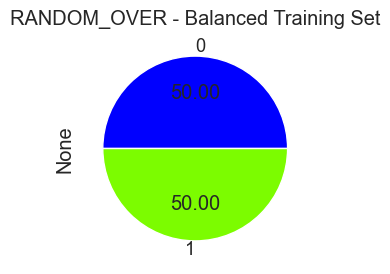

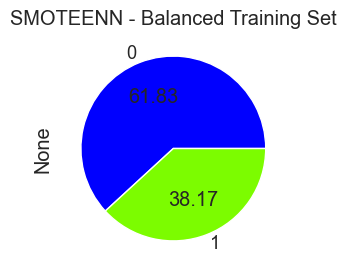

In [52]:
# Split the features into training and testing
xTrainUnCorr, xTestUnCorr, yTrainUnCorr, yTestUnCorr = getTrainTestScaledData(corrMatrixTop5FeaturesDF, yTarget, 
                    gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'], 
                    balanceTrainingData = True,
                    balStrategy = 'RANDOM_OVER',
                    dataBalanceRandomState = gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'])

plotClassDistribution(yTrainUnCorr, "RANDOM_OVER - Balanced Training Set")

# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainUnCorr, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = sklearnRandomForestUnBalanced.predict(xTestUnCorr)

print('-- Balancing Training Dataset - Random Over Sampler --\n')
# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestCorrUnBal = RandomForest(numOfTrees = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'])

# Train the model
customRandomForestCorrUnBal.fit(xTrainUnCorr, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = customRandomForestCorrUnBal.predict(xTestUnCorr)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

##############################################################################

# Split the features into training and testing
xTrainUnCorr, xTestUnCorr, yTrainUnCorr, yTestUnCorr = getTrainTestScaledData(corrMatrixTop5FeaturesDF, yTarget, 
                    gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'], 
                    balanceTrainingData = True,
                    balStrategy = 'SMOTEENN',
                    dataBalanceRandomState = gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'])

plotClassDistribution(yTrainUnCorr, "SMOTEENN - Balanced Training Set")

# Train sklearn random forest classifier on the training dataset
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestUnBalanced = RandomForestClassifier(n_estimators = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldCorrExtraUnBalBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestUnBalanced.fit(xTrainUnCorr, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = sklearnRandomForestUnBalanced.predict(xTestUnCorr)

print('-- Balancing Training Dataset - SMOTEENN --\n')
# Print the scores
print('--Sklearn Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

# Train our implementation of random forest classifier on the training dataset
# Create an instance of our Random Forest classifier
customRandomForestCorrUnBal = RandomForest(numOfTrees = gridSearchCrossFoldCorrExtraUnBalBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldCorrExtraUnBalBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldCorrExtraUnBalBestParams['min_samples_split'])

# Train the model
customRandomForestCorrUnBal.fit(xTrainUnCorr, yTrainUnCorr)

# Make predictions
yPredictionsCorrUnBal = customRandomForestCorrUnBal.predict(xTestUnCorr)

# Print the scores
print('\n--Our Random Forest Classifier--')
print(accuracy_score(yTestUnCorr, yPredictionsCorrUnBal))
print(confusion_matrix(yTestUnCorr, yPredictionsCorrUnBal))
print(classification_report(yTestUnCorr, yPredictionsCorrUnBal))

# Step 14 - Analysis on the Balanced Dataset found using Sklearn's Chi Square Test 

## Step 14.1 - Use Random Forest Classifier & Random Over Sampling Technique to analyze the top 5 home-measurable features found using Sklearn's Chi Square Test

### a - Balance the dataset


---Balanced Dataset---
After balancing the dataset by using the 'RANDOM_OVER' sampling technique there are 726 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 363 patients without PCOD and 363 patients with PCOD.


Text(0.5, 1.0, 'RANDOM OVER Sampling - Balanced Dataset')

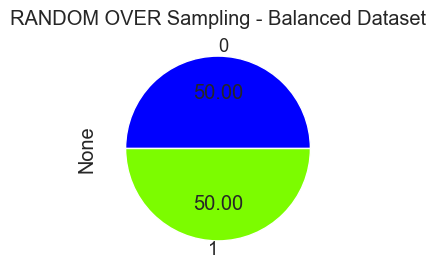

In [53]:
# Balance the dataset
balancedXChi, balancedYChi = balanceDataset(chiSquareTop5FeaturesDF, yTarget, 
                                            dataBalanceTechinique = 'RANDOM_OVER',
                                            balanceDataRandomState = 99)

print('\n---Balanced Dataset---')
print("After balancing the dataset by using the 'RANDOM_OVER' sampling technique",
      "there are", balancedXChi.shape[0], 
      "rows and", 
      balancedXChi.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = balancedYChi['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = balancedYChi.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("RANDOM OVER Sampling - Balanced Dataset")

### b - Evaluating sklearn Random Forest by applying grid search & cross fold validation

In [54]:
# Scale the features
balancedXScaledChi = scaleData(balancedXChi, balancedXChi.columns)

# Old grid params (Takes too much time to execute)
# Best Params Obtained: 
# {'criterion': 'entropy', 
# 'max_depth': 7, 
# 'max_features': 'sqrt', 
# 'min_samples_split': 2, 
# 'n_estimators': 100, 
# 'random_state': 99}

oldParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [40, 80, 100, 125],
    'max_features': ['sqrt'],
    'max_depth' : [5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [99],
    'min_samples_split':[2,3]
}

# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldChi = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldChi.fit(balancedXScaledChi, balancedYChi)

# Print the scores
gridSearchCrossFoldChiBestParams = gridSearchCrossFoldChi.best_params_

print(gridSearchCrossFoldChi.best_params_)
print(gridSearchCrossFoldChi.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 99}
0.8386868209730751


### c - Split the dataset into training & testing datasets and scale them

Text(0.5, 1.0, 'RANDOM OVER SAMPLER - Training Set')

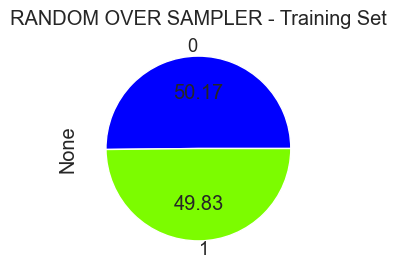

In [55]:
# Split the features into training and testing
xTrainChi, xTestChi, yTrainChi, yTestChi = getTrainTestDataset(balancedXChi, 
                                                               balancedYChi, 
                                                               gridSearchCrossFoldChiBestParams['random_state'])

# Scale the independent features
xTrainChiScaled, xTestChiScaled = scaleData(xTrainChi, xTrainChi.columns, xTestChi)

matPlt.figure(figsize=(3,3))
plotDataBal = yTrainChi.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("RANDOM OVER SAMPLER - Training Set")

### d - Apply Sklearn's Random Forest Classifier on dataset

In [56]:
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestChiBalRO = RandomForestClassifier(n_estimators = gridSearchCrossFoldChiBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldChiBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldChiBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldChiBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestChiBalRO.fit(xTrainChiScaled, yTrainChi)

# Make predictions
yPredictionsChi = sklearnRandomForestChiBalRO.predict(xTestChiScaled)

# Print the scores
print(accuracy_score(yTestChi, yPredictionsChi))
print(confusion_matrix(yTestChi, yPredictionsChi))
print(classification_report(yTestChi, yPredictionsChi))

0.8767123287671232
[[66  8]
 [10 62]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.89      0.86      0.87        72

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146



### e - Apply our implemented Random Forest Classifier on dataset

In [57]:
# Create an instance of our Random Forest classifier
customRandomForestChiBalRO = RandomForest(numOfTrees = gridSearchCrossFoldChiBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiBestParams['min_samples_split'])

# Train the model
customRandomForestChiBalRO.fit(xTrainChiScaled, yTrainChi)

# Make predictions
yPredictionsChi = customRandomForestChiBalRO.predict(xTestChiScaled)

# Print the scores
print(accuracy_score(yTestChi, yPredictionsChi))
print(confusion_matrix(yTestChi, yPredictionsChi))
print(classification_report(yTestChi, yPredictionsChi))

0.9041095890410958
[[69  5]
 [ 9 63]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        74
           1       0.93      0.88      0.90        72

    accuracy                           0.90       146
   macro avg       0.91      0.90      0.90       146
weighted avg       0.91      0.90      0.90       146



## Step 14.2 - Use Random Forest Classifier & SMOTEENN Sampling Technique to analyze the top 5 home-measurable features found using Sklearn's Chi Square Test

### a - Balance the dataset


---Balanced Dataset---
After balancing the dataset by using the 'SMOTEENN' sampling technique there are 450 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 213 patients without PCOD and 237 patients with PCOD.


Text(0.5, 1.0, 'SMOTEENN Sampling - Balanced Dataset')

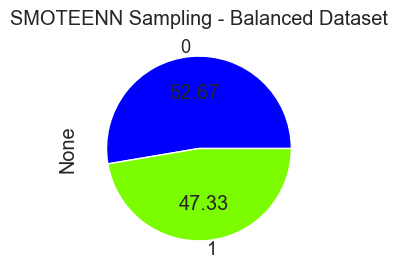

In [58]:
# Balance the dataset
balancedXChiSmote, balancedYChiSmote = balanceDataset(chiSquareTop5FeaturesDF, yTarget, 
                                            dataBalanceTechinique = 'SMOTEENN',
                                            balanceDataRandomState = 99)

print('\n---Balanced Dataset---')
print("After balancing the dataset by using the 'SMOTEENN' sampling technique",
      "there are", balancedXChiSmote.shape[0], 
      "rows and", 
      balancedXChiSmote.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = balancedYChiSmote['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = balancedYChiSmote.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("SMOTEENN Sampling - Balanced Dataset")

### b - Evaluating sklearn Random Forest by applying grid search & cross fold validation

In [59]:
# Scale the features
balancedXScaledChiSmote = scaleData(balancedXChiSmote, balancedXChiSmote.columns)

# Old grid params (Takes too much time to execute)
# Best Params Obtained: 
# {'criterion': 'entropy', 
# 'max_depth': 8, 
# 'max_features': 'sqrt', 
# 'min_samples_split': 2, 
# 'n_estimators': 40, 
# 'random_state': 100}
oldParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [20, 40, 60, 80, 100],
    'max_features': ['sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['entropy'],
    'random_state' : [56, 99, 100],
    'min_samples_split':[2,3]
}


# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldChi = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldChi.fit(balancedXScaledChiSmote, balancedYChiSmote)

# Print the scores
gridSearchCrossFoldChiBestParamsSmote = gridSearchCrossFoldChi.best_params_
print(gridSearchCrossFoldChi.best_params_)
print(gridSearchCrossFoldChi.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 100}
0.9711111111111113


### c - Split the dataset into training & testing datasets and scale them

Text(0.5, 1.0, 'SMOTEENN - Training Set')

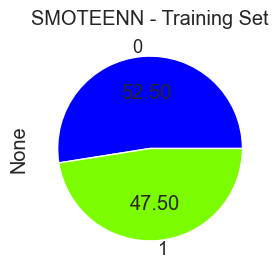

In [60]:
# Split the features into training and testing
xTrainChi, xTestChi, yTrainChi, yTestChi = getTrainTestDataset(balancedXScaledChiSmote, 
                                                               balancedYChiSmote, 
                                                               gridSearchCrossFoldChiBestParamsSmote['random_state'])

# Scale the independent features
xTrainChiScaledSmote, xTestChiScaledSmote = scaleData(xTrainChi, xTrainChi.columns, xTestChi)

matPlt.figure(figsize=(3,3))
plotDataBal = yTrainChi.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("SMOTEENN - Training Set")

### d - Apply Sklearn's Random Forest Classifier on dataset

In [61]:
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestChiBalSmote = RandomForestClassifier(n_estimators = gridSearchCrossFoldChiBestParamsSmote['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldChiBestParamsSmote['random_state'], 
                                 max_depth = gridSearchCrossFoldChiBestParamsSmote['max_depth'],
                                 min_samples_split = gridSearchCrossFoldChiBestParamsSmote['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestChiBalSmote.fit(xTrainChiScaledSmote, yTrainChi)

# Make predictions
yPredictionsChiSmote = sklearnRandomForestChiBalSmote.predict(xTestChiScaledSmote)

# Print the scores
print(accuracy_score(yTestChi, yPredictionsChiSmote))
print(confusion_matrix(yTestChi, yPredictionsChiSmote))
print(classification_report(yTestChi, yPredictionsChiSmote))

0.9666666666666667
[[40  2]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.96      0.98      0.97        48

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



### e - Apply our implemented Random Forest Classifier on dataset

In [62]:
# Create an instance of our Random Forest classifier
customRandomForestChiBalSmote = RandomForest(numOfTrees = gridSearchCrossFoldChiBestParamsSmote['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiBestParamsSmote['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiBestParamsSmote['min_samples_split'])

# Train the model
customRandomForestChiBalSmote.fit(xTrainChiScaledSmote, yTrainChi)

# Make predictions
yPredictionsChiSmote = customRandomForestChiBalSmote.predict(xTestChiScaledSmote)

# Print the scores
print(accuracy_score(yTestChi, yPredictionsChiSmote))
print(confusion_matrix(yTestChi, yPredictionsChiSmote))
print(classification_report(yTestChi, yPredictionsChiSmote))

0.9777777777777777
[[41  1]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        48

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



# Step 15 - Analysis on the Balanced Dataset found using Extra Tree Classifier & Correlation Matrix

## Step 15.1 - Use Random Forest Classifier & Random Over Sampling Technique to analyze the top 5 home-measurable features found using Extra Tree Classifier & Correlation Matrix

---Unbalanced Dataset---
There are 540 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 363 patients without PCOD and 177 patients with PCOD.


Text(0.5, 1.0, 'Unbalanced Dataset')

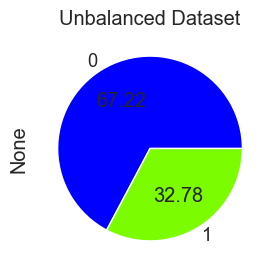

In [63]:
# Print the number of rows and columns
print('---Unbalanced Dataset---')
print("There are", corrMatrixTop5FeaturesDF.shape[0], 
      "rows and", 
      corrMatrixTop5FeaturesDF.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = yTarget['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = yTarget.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("Unbalanced Dataset")

### a - Balance the dataset


---Balanced Dataset---
After balancing the dataset by using the 'RANDOM_OVER' sampling technique there are 726 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 363 patients without PCOD and 363 patients with PCOD.


Text(0.5, 1.0, 'RANDOM OVER Sampling - Balanced Dataset')

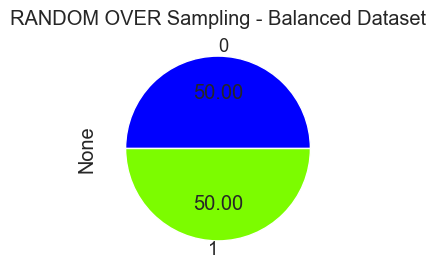

In [64]:
# Balance the dataset
balancedXExtraCorr, balancedYExtraCorr = balanceDataset(corrMatrixTop5FeaturesDF, yTarget, 
                                            dataBalanceTechinique = 'RANDOM_OVER',
                                            balanceDataRandomState = 99)

print('\n---Balanced Dataset---')
print("After balancing the dataset by using the 'RANDOM_OVER' sampling technique",
      "there are", balancedXExtraCorr.shape[0], 
      "rows and", 
      balancedXExtraCorr.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = balancedYExtraCorr['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = balancedYExtraCorr.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("RANDOM OVER Sampling - Balanced Dataset")

### b - Evaluating sklearn Random Forest by applying grid search & cross fold validation

In [65]:
# Scale the features
balancedXExtraCorrScaled = scaleData(balancedXExtraCorr, balancedXExtraCorr.columns)

# Old grid params (Takes too much time to execute)
# Best Params Obtained: 
# {'criterion': 'entropy', 
# 'max_depth': 4, 
# 'max_features': 'sqrt', 
# 'min_samples_split': 2, 
# 'n_estimators': 20, 
# 'random_state': 20}
oldParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [20, 40, 60, 80, 100],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43],
    'min_samples_split':[2,3]
}

# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldExtraCorr = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldExtraCorr.fit(balancedXExtraCorrScaled, balancedYExtraCorr)

# Print the scores
gridSearchCrossFoldExtraCorrBestParams = gridSearchCrossFoldExtraCorr.best_params_

print(gridSearchCrossFoldExtraCorr.best_params_)
print(gridSearchCrossFoldExtraCorr.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 20, 'random_state': 20}
0.8276239962210676


### c - Split the dataset into training & testing datasets and scale them

Text(0.5, 1.0, 'RANDOM OVER SAMPLER - Training Set')

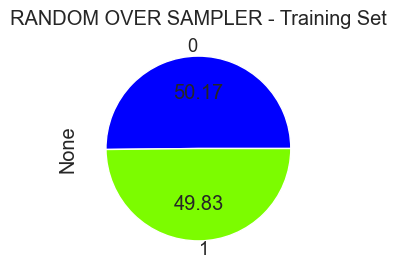

In [66]:
# Split the features into training and testing
xTrainExtraCorr, xTestExtraCorr, yTrainExtraCorr, yTestExtraCorr = getTrainTestDataset(balancedXExtraCorr, 
                                                               balancedYExtraCorr, 
                                                               99)

# Scale the independent features
xTrainExtraCorrScaled, xTestExtraCorrScaled = scaleData(xTrainExtraCorr, 
                                                        xTrainExtraCorr.columns, 
                                                        xTestExtraCorr)

matPlt.figure(figsize=(3,3))
plotDataBal = yTrainExtraCorr.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("RANDOM OVER SAMPLER - Training Set")

### d - Apply Sklearn's Random Forest Classifier on dataset

In [67]:
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestCorrBalRO = RandomForestClassifier(n_estimators = gridSearchCrossFoldExtraCorrBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldExtraCorrBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldExtraCorrBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldExtraCorrBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestCorrBalRO.fit(xTrainExtraCorrScaled, yTrainExtraCorr)

# Make predictions
yPredictionsExtraCorr = sklearnRandomForestCorrBalRO.predict(xTestExtraCorr)

# Print the scores
print(accuracy_score(yTestExtraCorr, yPredictionsExtraCorr))
print(confusion_matrix(yTestExtraCorr, yPredictionsExtraCorr))
print(classification_report(yTestExtraCorr, yPredictionsExtraCorr))

0.8287671232876712
[[55 19]
 [ 6 66]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        74
           1       0.78      0.92      0.84        72

    accuracy                           0.83       146
   macro avg       0.84      0.83      0.83       146
weighted avg       0.84      0.83      0.83       146



### e - Apply our implemented Random Forest Classifier on dataset

In [68]:
# Create an instance of our Random Forest classifier
customRandomForestCorrBalRO = RandomForest(numOfTrees = gridSearchCrossFoldChiBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldChiBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldChiBestParams['min_samples_split'])

# Train the model
customRandomForestCorrBalRO.fit(xTrainExtraCorrScaled, yTrainExtraCorr)

# Make predictions
yPredictionsExtraCorr = customRandomForestCorrBalRO.predict(xTestExtraCorr)

# Print the scores
print(accuracy_score(yTestExtraCorr, yPredictionsExtraCorr))
print(confusion_matrix(yTestExtraCorr, yPredictionsExtraCorr))
print(classification_report(yTestExtraCorr, yPredictionsExtraCorr))

0.8287671232876712
[[55 19]
 [ 6 66]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        74
           1       0.78      0.92      0.84        72

    accuracy                           0.83       146
   macro avg       0.84      0.83      0.83       146
weighted avg       0.84      0.83      0.83       146



## Step 15.2 - Use Random Forest Classifier & SMOTEENN Sampling Technique to analyze the top 5 home-measurable features found using using Extra Tree Classifier & Correlation Matrix

### a - Balance the dataset


---Balanced Dataset---
After balancing the dataset by using the 'SMOTEENN' sampling technique there are 417 rows and 5 columns in the loaded subset of the dataset.
The dataset contains 238 patients without PCOD and 179 patients with PCOD.


Text(0.5, 1.0, 'SMOTEENN - Balanced Dataset')

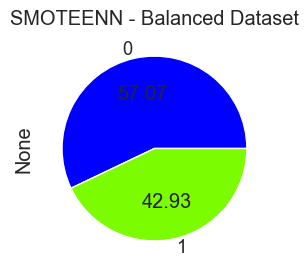

In [69]:
# Balance the dataset
balancedXExtraCorrSmote, balancedYExtraCorrSmote = balanceDataset(corrMatrixTop5FeaturesDF, yTarget, 
                                            dataBalanceTechinique = 'SMOTEENN',
                                            balanceDataRandomState = 99)

print('\n---Balanced Dataset---')
print("After balancing the dataset by using the 'SMOTEENN' sampling technique",
      "there are", balancedXExtraCorrSmote.shape[0], 
      "rows and", 
      balancedXExtraCorrSmote.shape[1], 
      "columns in the loaded subset of the dataset.")

pcodCount = balancedYExtraCorrSmote['is_pcos_present'].value_counts()
print("The dataset contains", pcodCount[0], "patients without PCOD and", pcodCount[1], "patients with PCOD.")

matPlt.figure(figsize=(3,3))
plotDataBal = balancedYExtraCorrSmote.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("SMOTEENN - Balanced Dataset")

### b - Evaluating sklearn Random Forest by applying grid search & cross fold validation

In [70]:
# Scale the features
balancedXExtraCorrSmoteScaled = scaleData(balancedXExtraCorrSmote, 
                                          balancedXExtraCorrSmote.columns)

# Old grid params (Takes too much time to execute)
# Best Params Obtained: 
# {'criterion': 'entropy', 
# 'max_depth': 3, 
# 'max_features': 'sqrt', 
# 'min_samples_split': 2, 
# 'n_estimators': 80, 
# 'random_state': 12}
oldParamGrid = { 
    'n_estimators': [20, 40, 60, 80, 100, 125, 150, 175, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43, 56, 99, 100],
    'min_samples_split':[2,3]
}

grid = { 
    'n_estimators': [40, 80, 100, 125],
    'max_features': ['sqrt'],
    'max_depth' : [3,4,5],
    'criterion' :['entropy'],
    'random_state' : [12, 20, 43],
    'min_samples_split':[2,3]
}

# Apply Grid Search CSV and 5-fold cross validation
gridSearchCrossFoldExtraCorrSmote = GridSearchCV(estimator = RandomForestClassifier(), 
                                      param_grid = grid, 
                                      cv = crossFolds, 
                                      scoring = 'accuracy',
                                      n_jobs = -1)

gridSearchCrossFoldExtraCorrSmote.fit(balancedXExtraCorrSmoteScaled, 
                                 balancedYExtraCorrSmote)

# Print the scores
gridSearchCrossFoldExtraCorrSmoteBestParams = gridSearchCrossFoldExtraCorrSmote.best_params_

print(gridSearchCrossFoldExtraCorrSmote.best_params_)
print(gridSearchCrossFoldExtraCorrSmote.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 12}
1.0


### c - Split the dataset into training & testing datasets and scale them

Text(0.5, 1.0, 'SMOTEENN - Training Set')

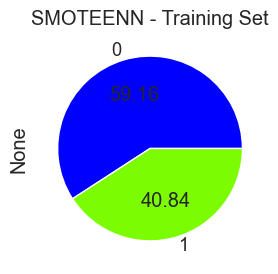

In [71]:
# Split the features into training and testing
xTrainExtraCorrSmote, xTestExtraCorrSmote, yTrainExtraCorrSmote, yTestExtraCorrSmote = getTrainTestDataset(balancedXExtraCorrSmote, 
                                                               balancedYExtraCorrSmote, 
                                                               gridSearchCrossFoldExtraCorrBestParams['random_state'])

# Scale the independent features
xTrainExtraCorrSmoteScaled, xTestExtraCorrSmoteScaled = scaleData(xTrainExtraCorrSmote, 
                                                        xTrainExtraCorrSmote.columns, 
                                                        xTestExtraCorrSmote)

matPlt.figure(figsize=(3,3))
plotDataBal = yTrainExtraCorrSmote.value_counts().plot.pie(autopct='%.2f', 
                                    colors = ['blue', 'lawngreen'],
                                   labels = ('0', '1'))

plotDataBal.set_title("SMOTEENN - Training Set")

### d - Apply Sklearn's Random Forest Classifier on dataset

In [72]:
# Create an instance of sklearn's RandomForestClassifier
sklearnRandomForestCorrBalSmote = RandomForestClassifier(n_estimators = gridSearchCrossFoldExtraCorrBestParams['n_estimators'], 
                                 criterion="entropy", 
                                 random_state = gridSearchCrossFoldExtraCorrBestParams['random_state'], 
                                 max_depth = gridSearchCrossFoldExtraCorrBestParams['max_depth'],
                                 min_samples_split = gridSearchCrossFoldExtraCorrBestParams['min_samples_split'],
                                 max_features = 'sqrt' )

# Train the model
sklearnRandomForestCorrBalSmote.fit(xTrainExtraCorrSmoteScaled, 
                        yTrainExtraCorrSmote)

# Make predictions
yPredictionsExtraCorrSmote = sklearnRandomForestCorrBalSmote.predict(xTestExtraCorrSmote)

# Print the scores
print(accuracy_score(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))
print(confusion_matrix(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))
print(classification_report(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))

0.9761904761904762
[[40  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        43

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



### e - Apply our implemented Random Forest Classifier on dataset

In [73]:
# Create an instance of our Random Forest classifier
customRandomForestCorrBalSmote = RandomForest(numOfTrees = gridSearchCrossFoldExtraCorrBestParams['n_estimators'], 
                                   maximumTreeDepth = gridSearchCrossFoldExtraCorrBestParams['max_depth'],
                                   minimumSamplesSplit = gridSearchCrossFoldExtraCorrBestParams['min_samples_split'])

# Train the model
customRandomForestCorrBalSmote.fit(xTrainExtraCorrSmoteScaled, 
                       yTrainExtraCorrSmote)

# Make predictions
yPredictionsExtraCorrSmote = customRandomForestCorrBalSmote.predict(xTestExtraCorrSmote)

# Print the scores
print(accuracy_score(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))
print(confusion_matrix(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))
print(classification_report(yTestExtraCorrSmote, yPredictionsExtraCorrSmote))

0.9761904761904762
[[40  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        43

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84

